In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics


nx,ny=64,146

#X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
#argmin=X[:,0].argmin()
FA_spatial=np.load('full_spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))



from sklearn.decomposition import PCA


sil=dict()
sil[512]=[]
sil[1024]=[]
sil[2048]=[]
sil[4096]=[]

cal=dict()
cal[512]=[]
cal[1024]=[]
cal[2048]=[]
cal[4096]=[]

dav=dict()
dav[512]=[]
dav[1024]=[]
dav[2048]=[]
dav[4096]=[]

ns_clusters_=np.arange(50,950,25)

for n_pca in (512,1024,2048,4096):
    pca = PCA(n_components=n_pca, svd_solver='randomized')
    pca_features=pca.fit_transform(FA_spatial)#components_
    connectivity = grid_to_graph(n_x=nx, n_y=ny)
    for n_clusters_ in ns_clusters_:
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward').fit(pca_features)
        labels = ward.labels_
        #sample_silhouette_values = metrics.silhouette_samples(pca_features, labels)
        sil[n_pca].append(metrics.silhouette_score(pca_features,labels))
        cal[n_pca].append(metrics.calinski_harabasz_score(pca_features,labels))
        dav[n_pca].append(metrics.davies_bouldin_score(pca_features,labels))

np.save("sil",sil)
np.save("cal",cal)
np.save("dav",dav)


Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


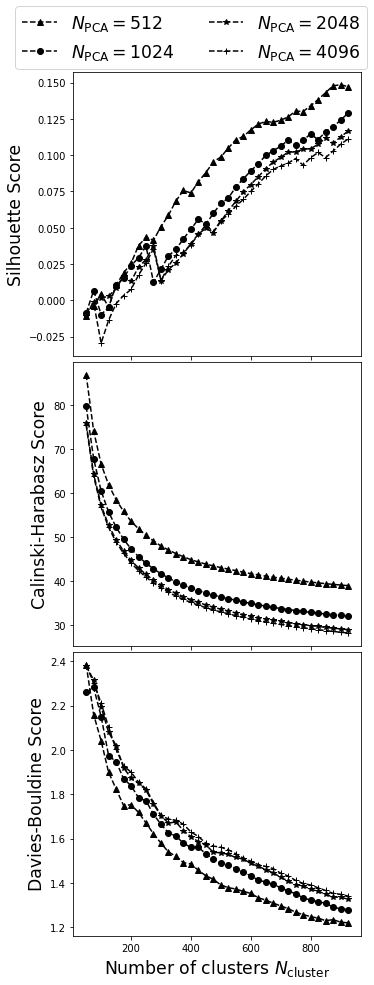

In [36]:
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=1, left=0, right=1./3,bottom=0,top=1., wspace=0.002,hspace=0.02)

#ns_pca=(512,1024,2048,4096)


ax1 = fig.add_subplot(gs[0,0])
t1,=ax1.plot(ns_clusters_,sil[512],'k^--')
t2,=ax1.plot(ns_clusters_,sil[1024],'ko--')
t3,=ax1.plot(ns_clusters_,sil[2048],'k*--')
t4,=ax1.plot(ns_clusters_,sil[4096],'k+--')

ax1.legend([t1,t2,t3,t4],["$N_{\mathrm{PCA}}=512$","$N_{\mathrm{PCA}}=1024$","$N_{\mathrm{PCA}}=2048$","$N_{\mathrm{PCA}}=4096$"],fontsize='xx-large',ncol=2,loc=(-0.2,1.01))
#ax1.text("(a)")

ax1.set_ylabel("Silhouette Score",size='xx-large')


ax2 = fig.add_subplot(gs[1,0], sharex=ax1)
ax2.plot(ns_clusters_,cal[512],'k^--')
ax2.plot(ns_clusters_,cal[1024],'ko--')
ax2.plot(ns_clusters_,cal[2048],'k*--')
ax2.plot(ns_clusters_,cal[4096],'k+--')
ax2.set_ylabel("Calinski-Harabasz Score",size='xx-large')

ax3 = fig.add_subplot(gs[2,0], sharex=ax1)
ax3.plot(ns_clusters_,dav[512],'k^--')
ax3.plot(ns_clusters_,dav[1024],'ko--')
ax3.plot(ns_clusters_,dav[2048],'k*--')
ax3.plot(ns_clusters_,dav[4096],'k+--')
ax3.set_ylabel("Davies-Bouldine Score",size='xx-large')


ax3.set_xlabel("Number of clusters $N_{\mathrm{cluster}}$",size='xx-large')

plt.savefig('fig10.tif',format='tif',bbox_inches ='tight')